In [ ]:
from bs4 import BeautifulSoup
import os
import requests
from datetime import timedelta
from datetime import datetime as dt
import ast
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.euro2day.gr/SearchRes.aspx?q=πανδημια&df=04052020&dt=27062020&p="
for i in range(1,77):
    url = base_url + str(i)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    links = s.select("div.list-item h3 a")
    links = set(links)
    
    url = ["https://www.euro2day.gr" + link['href'] for link in links]
    
    
    for l in url:
      link = l
      print(l)
      scraped_links.append(l)

 


print(len(scraped_links)) 

scraped_links = (set(scraped_links))

https://www.euro2day.gr/news/world/article/2030264/epistrefei-sto-lockdown-to-mpoyenos-aires.html
https://www.euro2day.gr/news/economy/article/2030112/to-mhnyma-apo-ta-omologa.html
https://www.euro2day.gr/news/world/article/2030144/to-neo-orama-ths-germanias-ehei-afethria-thn-kina-.html
https://www.euro2day.gr/news/world/article/2030075/poso-pithanh-einai-mia-nea-foyska-hreoys-logo-pand.html
https://www.euro2day.gr/news/world/article/2030304/o-kentroos-maikl-martin-prothypoyrgos-ths-irlandia.html
https://www.euro2day.gr/news/world/article/2030262/h-eyroph-krata-kleista-ta-synora-me-tis-hpa.html
https://www.euro2day.gr/markets/europe/article-market/2030223/se-arnhtiko-edafos-oi-eyroagores.html
https://www.euro2day.gr/news/economy/article/2030271/mikropistoseis-poio-epitokio-theoreitai-logiko-.html
https://www.euro2day.gr/news/world/article/2030259/makron-mporoyme-na-prohorhsoyme-me-th-rosia-se-ena.html
https://www.euro2day.gr/news/world/article/2030294/diafonoyn-merkel--koyrts-gia-to-ta

In [ ]:
text_list=[]
for i in scraped_links:  
    dic = {}
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("title")[0].text.strip()
    else:
        print("ARTICLE NO: ", i, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
        
    date = soup.select("div.post-date p strong")
    if (date):
        dic['date'] = soup.select("div.post-date p strong")[0].text.strip()
    else:
        print("ARTICLE NO: ", i, " HAS NO date")
        dic['date'] = "NO date"
        
        
    category = soup.select("ul.article-category li")
    if (category):
        dic['category'] = soup.select("ul.article-category li")[0].text.strip()
    else:
        print("ARTICLE NO: ", i, " HAS NO author")
        dic['category'] = "NO category"        
        
    
    article =  soup.select("article#textforresizing")
    if (article):
        dic['body'] = soup.select("article#textforresizing")[0].text
    else:
        print("ARTICLE NO: ", i, " HAS NO body")
        dic['body'] = "NO body"  
  
    
    dic['url'] = i

    
    text_list.append(dic)
    #print(dic)
    
    time.sleep(0.5)

ARTICLE NO:  https://www.euro2day.gr/chameleon/article-blog-chameleon/2023004/poia-tha-einai-h-fetinh-syntagh-gia-to-exoikonomhs.html  HAS NO date
ARTICLE NO:  https://www.euro2day.gr/chameleon/article-blog-chameleon/2029402/me-33-ekat-eyro-gemisan-ta-portofolia-ton-metohon.html  HAS NO date
ARTICLE NO:  https://www.euro2day.gr/chameleon/article-blog-chameleon/2028407/to-zori-sth-metohh-ths-loylhs-kai-h-poreia-ths-pla.html  HAS NO date
ARTICLE NO:  https://www.euro2day.gr/strathgikos-analyths/article-blog-strathgikos-analyths/2029207/eides-h-kypros.html  HAS NO date
ARTICLE NO:  https://www.euro2day.gr/chameleon/article-blog-chameleon/2026277/h-sfagh-ton-prothesmiakon-katatheseon-kai-h-hara-t.html  HAS NO date
ARTICLE NO:  https://www.euro2day.gr/strathgikos-analyths/article-blog-strathgikos-analyths/2022642/h-pshfiakh-oikonomia-hreiazetai-mia-sklhrh-eett.html  HAS NO date
ARTICLE NO:  https://www.euro2day.gr/chameleon/article-blog-chameleon/2025163/h-mevaco-h-pandhmia-kai-oi-provlepse

In [ ]:
df20 = pd.DataFrame(text_list)

In [ ]:
df20['body'] = df20['body'].str.strip()

In [ ]:
df20['date'] = df20['date'].str.replace('Ιανουαρίου', "January")
df20['date'] = df20['date'].str.replace('Φεβρουαρίου', "February")
df20['date'] = df20['date'].str.replace('Μαρτίου', "March")
df20['date'] = df20['date'].str.replace('Απριλίου', "Aprin")
df20['date'] = df20['date'].str.replace('Μαΐου', "May")
df20['date'] = df20['date'].str.replace('Ιουνίου', "June")
df20['date'] = df20['date'].str.replace('Ιουλίου', "July")
df20['date'] = df20['date'].str.replace('Αυγούστου', "August")
df20['date'] = df20['date'].str.replace('Σεπτεμβρίου', "September")
df20['date'] = df20['date'].str.replace('Οκτωβρίου', "October")
df20['date'] = df20['date'].str.replace('Νοεμβρίου', "November")
df20['date'] = df20['date'].str.replace('Δεκεμβρίου', "December")

In [ ]:
df20['date'] = pd.to_datetime(df20['date'], dayfirst=True, errors='coerce')
df20['date'].dt.date
df20['year'] = df20['date'].dt.strftime('%Y')
df20['month'] = df20['date'].dt.strftime('%m')
df20['day'] = df20['date'].dt.strftime('%d')
df20 = df20[df20['date'].notnull()]
df20.head(2)

,title,date,category,body,url,year,month,day
0,Πίσω έχει η αχλάδα την ουρά στα δημοσιονομικά,2020-06-12 08:02:00,SPECIALS,Όσοι περιμένουν μειώσεις στη φορολογία της εργ...,https://www.euro2day.gr/specials/dr_money/arti...,2020,06,12
1,Γ. Παπανδρέου: Ουσιαστική στήριξη των μικρομεσ...,2020-05-08 23:47:00,ΕΙΔΗΣΕΙΣ,Συναντήσεις με τους προέδρους της Ομοσπονδίας ...,https://www.euro2day.gr/news/politics/article/...,2020,05,08


In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
df20.to_csv("DF20.csv", index=False)
!cp DF20.csv "drive/My Drive/final project/"

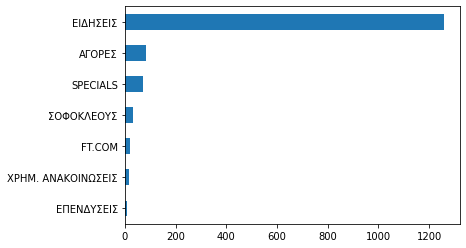

In [ ]:
df20['category'].value_counts(ascending = True).plot.barh()

In [ ]:
text20 = df20['body'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
add_stop = ['πανδημία', 'πανδημίας']

In [ ]:
len(text20)

5743677

In [ ]:
nlp = spacy.load('el_core_news_sm')
nlp.max_length = 5743677

In [ ]:
full_doc = nlp(text20)
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
wordcloud = WordCloud(
    stopwords = list(nlp.Defaults.stop_words) + list(STOPWORDS) + list(add_stop),
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['body'])

In [ ]:
count_vector.shape

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words) + list(STOPWORDS) + list(add_stop), max_features=20)
count_vector = cv.fit_transform(df['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


In [ ]:
results.sum(axis =0).sort_values(ascending = True).tail(16).plot.barh()

In [ ]:
from textblob import TextBlob
from nltk.util import ngrams

In [ ]:
words = text.split()

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, ngram_range=(2, 2))
count_vector = cv.fit_transform(df['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [ ]:
results.sum(axis =0).sort_values(ascending = True).tail(16).plot.barh()

In [ ]:
df.dtypes

In [ ]:
XA.dtypes

In [ ]:
XA.set_index('DateTime' , inplace=True)

In [ ]:
XA['2020':'2020'].plot(y='Κλείσιμο')
plt.ylim(0, 1500)

In [ ]:
XA['Κλείσιμο'].resample('M').mean().plot()
plt.ylim(0, 1500)

In [ ]:
plt.style.use('ggplot')

In [ ]:
XA['Κλείσιμο'].plot()
XA['Κλείσιμο'].resample('A').mean().plot()
XA['Κλείσιμο'].resample('M').mean().plot()
plt.ylim(0, 1500)

In [ ]:
XA.groupby(by=XA.index.month).mean().plot()

In [ ]:
XA['Κλείσιμο'].resample('A').max().plot(color='red')
XA['Κλείσιμο'].resample('A').min().plot(color='green')
XA['Κλείσιμο'].resample('A').mean().plot(color='blue')

In [ ]:
XA_new = XA['2020':]

In [ ]:
XA_new

In [ ]:
XA_new['Κλείσιμο'].resample('M').max().plot(color='red')
XA_new['Κλείσιμο'].resample('M').min().plot(color='green')
XA_new['Κλείσιμο'].resample('M').mean().plot(color='blue')

In [ ]:
import scipy
import seaborn as sns 
import sklearn.manifold
import json
import urllib.parse

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
df.body = [str (item) for item in df['body']]
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['tokenized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['body'])
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
sns.set_theme()

In [ ]:
ax = sns.heatmap(arr[730:750, 730:750], vmin=0, vmax=1)

In [ ]:
#df.set_index('date' , inplace=True)

In [ ]:
#ax = df['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
#df['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
#df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()